In [45]:
from games.tictactoe.tictactoe import TicTacToe
from agents.agent_random import RandomAgent
from agents.minimax import MiniMax
from agents.mcts import MonteCarloTreeSearch, MCTSNode
from agents.counterfactualregret_t import CounterFactualRegret
import numpy as np
from collections import defaultdict

In [63]:
game = TicTacToe(render_mode='')

In [47]:
agents_rd = dict(map(lambda agent: (agent, RandomAgent(game=game, agent=agent)), game.agents))
agents_rd

{'X': <agents.agent_random.RandomAgent at 0x138e1b010>,
 'O': <agents.agent_random.RandomAgent at 0x1396c4ad0>}

In [4]:
game.reset()
while not game.terminated():
    game.render()
    print(game.eval(game.agent_selection))
    action = agents_rd[game.agent_selection].action()
    game.step(action)
game.render()
print(game.eval(game.agent_selection))
print(game.rewards)

Player: X
Board:
 .  .  . 
 .  .  . 
 .  .  . 

0.0
Player: O
Board:
 .  .  . 
 X  .  . 
 .  .  . 

-0.25
Player: X
Board:
 .  O  . 
 X  .  . 
 .  .  . 

0.0
Player: O
Board:
 .  O  . 
 X  .  X 
 .  .  . 

-0.125
Player: X
Board:
 .  O  . 
 X  .  X 
 O  .  . 

-0.25
Player: O
Board:
 X  O  . 
 X  .  X 
 O  .  . 

0.0
Player: X
Board:
 X  O  . 
 X  .  X 
 O  O  . 

0.0
Player: O
Board:
 X  O  X 
 X  .  X 
 O  O  . 

-0.125
Player: X
Board:
 X  O  X 
 X  .  X 
 O  O  O 

-1
{'X': -1, 'O': 1}


In [65]:
players = {}
#players[game.agents[0]] = MonteCarloTreeSearch(game=game, agent=game.agents[0], simulations=100)
#players[game.agents[1]] = MiniMax(game=game, agent=game.agents[1], depth=2)
players[game.agents[0]] = RandomAgent(game=game, agent=game.agents[0])
players[game.agents[1]] = MonteCarloTreeSearch(game=game, agent=game.agents[1], simulations=100)


In [66]:
game.reset()
game.render()
print(game.observe(game.agents[0]))
action = players[game.agent_selection].action()
print(action)
game.step(action)
game.render()
print(game.observe(game.agents[1]))
action = players[game.agent_selection].action()
game.step(action)
print(action)
game.render()


Player: X
Board:
 .  .  . 
 .  .  . 
 .  .  . 

[[0 0 0]
 [0 0 0]
 [0 0 0]]
8
Player: O
Board:
 .  .  . 
 .  .  . 
 .  .  X 

[[0 0 0]
 [0 0 0]
 [0 0 2]]
2
Player: X
Board:
 .  .  O 
 .  .  . 
 .  .  X 



In [67]:
values = defaultdict(list)
N = 50
for i in range(N):    
    game.reset()
    while not game.terminated():
        agent = game.agent_selection
        action = players[agent].action()
        game.step(action)
    for agent in game.agents:
        values[agent].append(game.reward(agent))
for agent in game.agents:
    print(f"Agent {agent} average reward: {np.mean(values[agent])} over {N} games")
    print(f"Agent {agent} rewards: {values[agent]}")
    print(f"Agent {agent} win rate: {np.sum(np.array(values[agent]) > 0)} over {N} games")

Agent X average reward: -0.82 over 50 games
Agent X rewards: [-1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, 0]
Agent X win rate: 2 over 50 games
Agent O average reward: 0.82 over 50 games
Agent O rewards: [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
Agent O win rate: 43 over 50 games


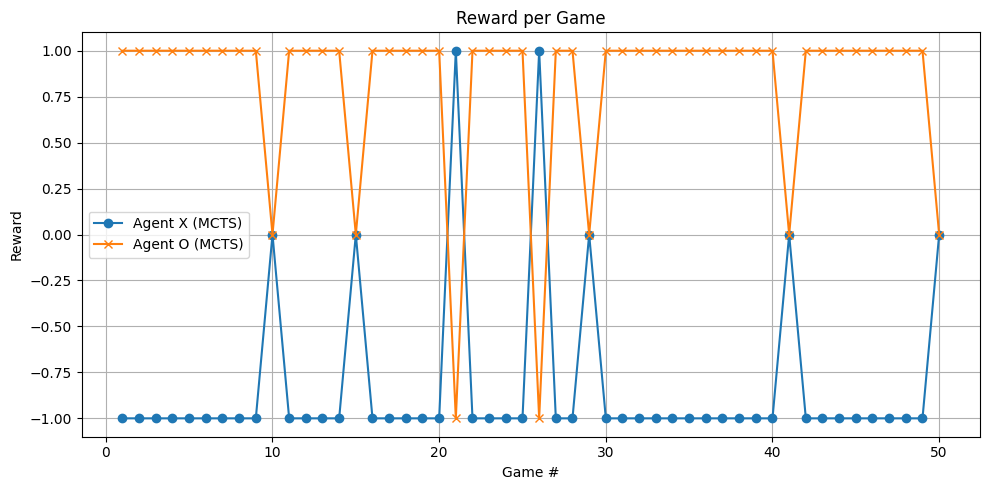

In [68]:
from matplotlib import pyplot as plt
# Eje X: número de juego
games = list(range(1, 51))
rewards_x = values[game.agents[0]]
rewards_o = values[game.agents[1]]
# Gráfico de rewards
plt.figure(figsize=(10, 5))
plt.plot(games, rewards_x, marker='o', label='Agent X (MCTS)')
plt.plot(games, rewards_o, marker='x', label='Agent O (MCTS)')
plt.xlabel('Game #')
plt.ylabel('Reward')
plt.title('Reward per Game')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

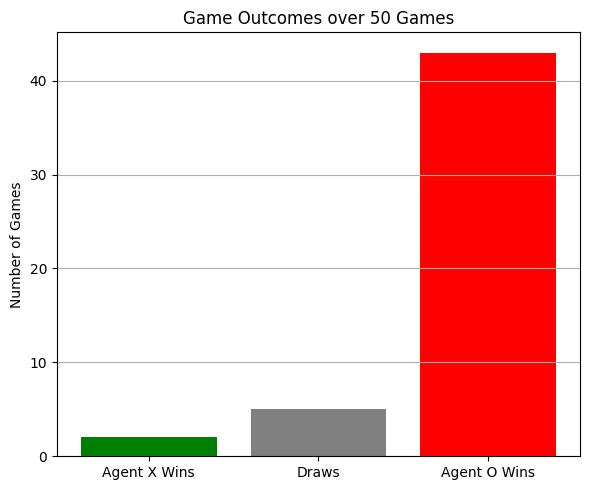

In [69]:
# Cálculo de resultados
wins_x = rewards_x.count(1)
wins_o = rewards_o.count(1)
draws = 50 - wins_x - wins_o

# Gráfico de barras
plt.figure(figsize=(6, 5))
plt.bar(['Agent X Wins', 'Draws', 'Agent O Wins'], [wins_x, draws, wins_o], color=['green', 'gray', 'red'])
plt.ylabel('Number of Games')
plt.title('Game Outcomes over 50 Games')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
from nbconvert import HTMLExporter
import nbformat, os, time

def save_notebook_to_html(notebook_path=f"TicTacToe.ipynb"):
    """Guarda el notebook como HTML"""
    exporter = HTMLExporter()
    notebook = nbformat.read(notebook_path, as_version=4)
    html, _ = exporter.from_notebook_node(notebook)
    
    os.makedirs("notebook_exports", exist_ok=True)
    timestamp = time.strftime("%Y%m%d-%H%M%S")
    output_path = f"notebook_exports/TicTacToe_RandomAgent_vs_MCTS_100sim_{timestamp}.html"
    
    with open(output_path, "w") as f:
        f.write(html)
    
    return output_path

In [70]:
save_notebook_to_html()

'notebook_exports/TicTacToe_MCTS_100sim_vs_MiniMax_depth2_20250703-010239.html'